<a href="https://colab.research.google.com/github/jieunjeon/Data-Science-Fundamental/blob/master/Exploration/EXP05_Face_Embedding_US_Presidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is embedding?
- **Embedding**: **Preserving necessary information while transforming high-dimensional information into low-dimensional information,**   
Then apply it to reflect** how similar the two faces are the distance** between the **face embedding vectors**


## What types of data can be represented using embedding techniques?
- Unstructured data such as text (words, sentences, whole documents), images, audio, etc.
- Items that have only interaction context and no input attributes, such as a list of movies the user has watched and a user ID
- Complex structured data such as graphs and networks. Examples: social networks and biochemical compounds
- Multi-modal transformations such as image retrieval and image captioning using text descriptions Sparse characteristics such as location and occupancy (converting them to dense attributes)
- Higher-order items such as customer records with more than 300 demographic, social, financial, and behavioral attributes (translating these into a more concise representation)

## What are some examples of use cases for embeddings?
- It can be used for s**imilarity analysis, search, and machine transfer learning.**

# How to create Face Embedding?

## Face Recognition

Before getting the face embeddings to see how similar the two faces in the image are, we first need to accurately recognizing and extracting only the face area in the image.    
If you pass unnecessary information, such as the surrounding background or clothes, to the face embedding model, you won't be able to get an embedding vector that accurately reflects the characteristics of the face.   
The cut face image can be used for various tasks such as clustering, similarity, and classification through a deep learning network.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


file_list: ['/content/drive/MyDrive/aiffel/EXP_5_data/presidents/biden.jpg', '/content/drive/MyDrive/aiffel/EXP_5_data/presidents/obama.jpg', '/content/drive/MyDrive/aiffel/EXP_5_data/presidents/reagan.jpg', '/content/drive/MyDrive/aiffel/EXP_5_data/presidents/trump.jpg', '/content/drive/MyDrive/aiffel/EXP_5_data/presidents/clinton.jpg', '/content/drive/MyDrive/aiffel/EXP_5_data/presidents/bush.jpg']


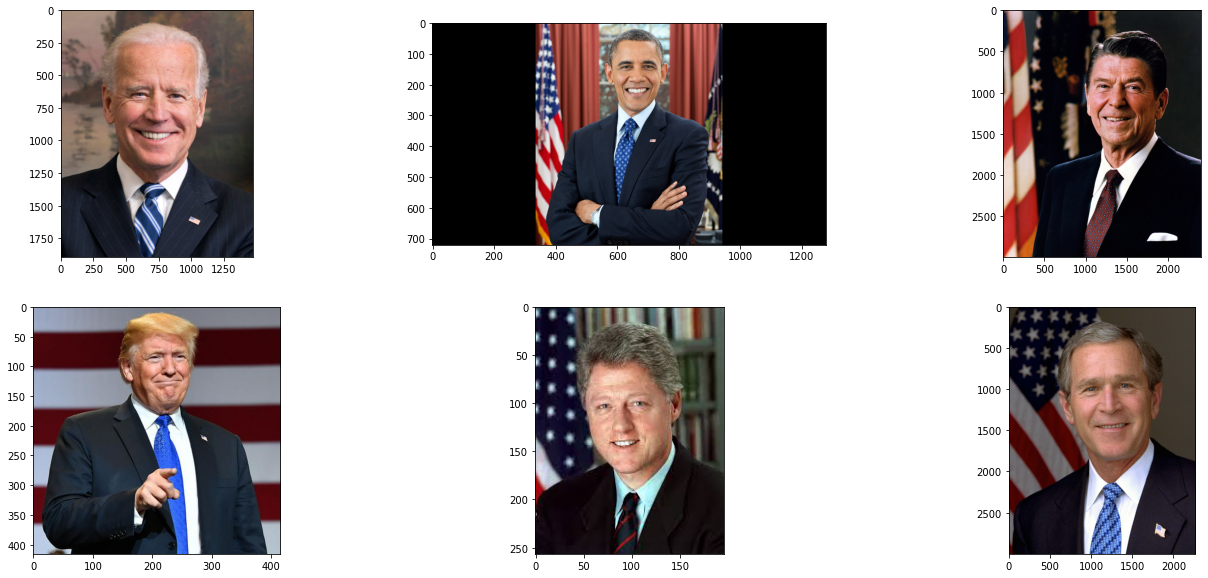

In [3]:
import glob
my_image_path = '/content/drive/MyDrive/aiffel/EXP_5_data/presidents';
dir_path = my_image_path
file_list = glob.glob(my_image_path + "/*.jpg")

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

In [5]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=650750063b1e0f76249c542bcc4abbe77d3c39698652f8e08ea2c1dcb92c8b2a
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


[(98, 758, 284, 572)]


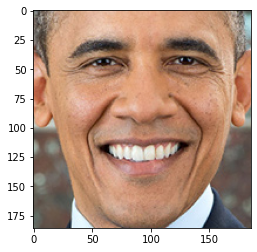

In [7]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/aiffel/EXP_5_data/presidents/obama.jpg';
# image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [8]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

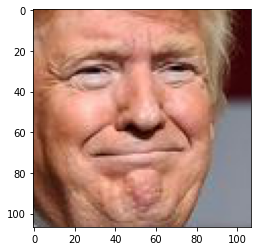

In [10]:
image_path = '/content/drive/MyDrive/aiffel/EXP_5_data/presidents/trump.jpg';

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## FaceNet

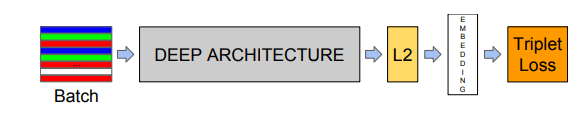

Let's learn through **FaceNet** announced by **Google** in **2015**. FaceNet is not very different from the deep learning model we have seen, but it** creates an embedding through L2 normalization behind the network and uses Triplet Loss **here.   
   
Let's take a look at** L2 Normalization **one by one. **L2 Normalization **is the process of Normalization by dividing the result by finding the L2 Distance of the model result. The embedding vector that has passed through the **L2 Normalization** layer will have a size of 1, so if there is a sphere with a radius of 1 in a 128-dimensional space, it will be distributed like a vector pointing to a point on the surface of the sphere. With this constraint, when calculating the distance between two points, **only the angle between the two vectors will be affected**, regardless of the absolute magnitude of the two vectors.   
      
So what is **Triplet Loss? **Let's take a look at the figure below introduced in the FaceNet paper.

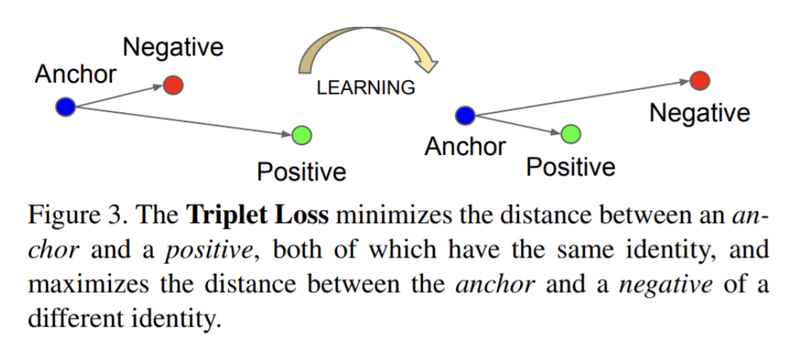

Triplet Loss can **train a network with a loss function computed using three pairs of data**.   
   
At the beginning, I mentioned that the only information to be preserved in the embedding vector is the relative comparison number that A is closer to C than to B. The Triplet Loss concept reflects precisely this idea. In the human face dataset, the dataset is configured so that A and C are embedding vectors from the same person's face photo, and B is an embedding vector created from another person's face photo. If so, the logic that A is closer to C than to B must be true.

Triplet Loss has the effect of making the distance between embedding vectors A-C of the same person close and the distance between embedding vectors B-C of another person farther. As you can see in the picture,** if the embeddings from the same person's face are placed farther away, it creates an embedding vector to get closer through learning!**

In [11]:
import os
dir_path = '/content/drive/MyDrive/aiffel/EXP_5_data/presidents/';
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['biden.jpg', 'obama.jpg', 'reagan.jpg', 'trump.jpg', 'clinton.jpg', 'bush.jpg']


In [12]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126254,  0.11014756, -0.01082434, -0.05268792,  0.01033733,
        -0.0081381 , -0.07251763, -0.09226447,  0.19304717, -0.09246377,
         0.23908521,  0.06770286, -0.2212313 , -0.14119361,  0.05562158,
         0.13705495, -0.17924419, -0.07232306, -0.1118328 , -0.11370808,
         0.03956439, -0.01019117,  0.09421782,  0.04493129, -0.12757553,
        -0.34449607, -0.05374933, -0.17703304,  0.00868219, -0.09721589,
        -0.09817185,  0.00278223, -0.17721349, -0.12789799,  0.0348983 ,
        -0.01991227, -0.00838926, -0.00132864,  0.18308598,  0.02447565,
        -0.12376569,  0.0995703 ,  0.02323568,  0.22983313,  0.28385246,
         0.06655722, -0.00558913, -0.09833538,  0.10058984, -0.23476952,
         0.06006299,  0.13415912,  0.08373027,  0.03900497,  0.10194538,
        -0.19337651,  0.01717631,  0.0897897 , -0.1600512 ,  0.01892103,
         0.03082441, -0.06051283, -0.04526768,  0.04633338,  0.20678683,
         0.10299791, -0.12437537, -0.0490515 ,  0.1

Let's create a helper function that **retrieves the embeddings of all image files in your images directory and returns them in a dict structure.**   
Each element of th**e dictionary** will be a person name: **embedding vector.** The function name is get_face_embedding_dict(dir_path), and that's what you want to use like this:

In [13]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
        
    return embedding_dict

In [14]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

array([-0.15962465,  0.20268653,  0.03236368,  0.02439236, -0.06226429,
        0.05140708,  0.07351795, -0.16823344,  0.06962213, -0.05557962,
        0.17270115, -0.05094168, -0.35293114, -0.03164374,  0.0379298 ,
        0.17343853, -0.13260117, -0.15357378, -0.23523533, -0.08442686,
       -0.00134148,  0.0321067 , -0.08926149, -0.0267079 , -0.09581175,
       -0.25792351, -0.01057006, -0.11071659,  0.03133575, -0.0744492 ,
        0.05670554, -0.02273792, -0.19461147, -0.04576051,  0.00947583,
        0.01806067, -0.15026242, -0.0778732 ,  0.17577612,  0.01933256,
       -0.19744582, -0.03930522,  0.07374461,  0.20196025,  0.14767551,
       -0.01415388,  0.01724749, -0.11976211,  0.0946297 , -0.24318154,
       -0.0275512 ,  0.12169901,  0.14837697,  0.17079787,  0.06952564,
       -0.15360463,  0.02005425,  0.08199155, -0.19544819,  0.10653647,
        0.11468481, -0.21902826, -0.07677589, -0.06791048,  0.105876  ,
        0.05921572, -0.061157  , -0.11171091,  0.23917486, -0.15

# Distance Metrics btn Face Embeddings

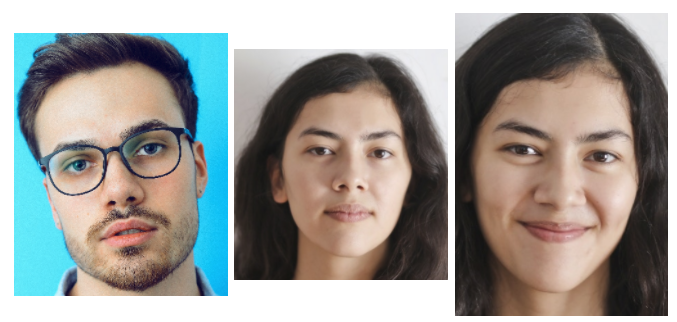

The photos of the three people above (image source: pexels.com) have been pre-cut with the Face Detection model. And using the model used in the previous step, we extracted a 128-dimensional embedding vector.    
Embedding vector values are put in each of A, B, and C from the left in order. Of course, it's easy to see that B and C are the same person. If so, let's first check whether the distance between embeddings is secured through training so that the model can also be distinguished.

In [15]:
import numpy as np

A = np.array([0.0019173615146428347, 0.17689529061317444, 0.0763588473200798, -0.024574430659413338, -0.13141091167926788, 0.0344821996986866, -0.0374063216149807, -0.07056370377540588, 0.048655178397893906, -0.03414120525121689, 0.22696012258529663, -0.061402369290590286, -0.24329672753810883, -0.039421431720256805, 0.0621466189622879, 0.1220191940665245, -0.1616966724395752, -0.06176016479730606, -0.18894734978675842, -0.06051916256546974, -0.010404378175735474, -0.05918719246983528, 0.02205268107354641, -0.06932859122753143, -0.20260301232337952, -0.2425234317779541, -0.04454419016838074, -0.11400106549263, -0.02022719383239746, -0.15134216845035553, 0.07622595876455307, -0.0323314443230629, -0.1404413878917694, -0.056338660418987274, -0.04520038887858391, -0.026131991297006607, -0.0352761372923851, -0.0679447203874588, 0.1318240910768509, 0.034210119396448135, -0.17475582659244537, 0.13853909075260162, -0.0027398746460676193, 0.227312833070755, 0.3029572069644928, 0.004932125099003315, 0.05853061378002167, -0.07521739602088928, 0.1443275809288025, -0.2340908795595169, 0.030092637985944748, 0.040133409202098846, 0.1672351360321045, 0.05728958174586296, 0.11475440859794617, -0.07548368722200394, 0.040267568081617355, 0.16487033665180206, -0.21067440509796143, 0.036163005977869034, 0.051559075713157654, -0.05994952470064163, 0.029524143785238266, -0.04122130945324898, 0.13074155151844025, 0.1142958477139473, -0.00561982998624444, -0.09740489721298218, 0.18533651530742645, -0.10422169417142868, -0.11409182846546173, 0.02283927984535694, -0.08339140564203262, -0.13673236966133118, -0.3275497853755951, -0.0002689119428396225, 0.2842463254928589, 0.13883619010448456, -0.29149484634399414, -0.07276060432195663, -0.03179163485765457, 0.011192545294761658, 0.03802505508065224, 0.03392524644732475, -0.03972085565328598, -0.12013585865497589, -0.06272879987955093, -0.026893358677625656, 0.2430601865053177, -0.12022019177675247, -0.010466678068041801, 0.20199882984161377, 0.051095910370349884, -0.13243277370929718, 0.06056740880012512, -0.04802423343062401, -0.12318279594182968, -0.013157366774976254, -0.12076889723539352, -0.07183175534009933, -0.01982908323407173, -0.15032584965229034, -0.026652328670024872, 0.06820419430732727, -0.24668177962303162, 0.1818322390317917, -0.01959969662129879, -0.07208395004272461, -0.0680316612124443, -0.038368165493011475, 0.021410271525382996, 0.06388168036937714, 0.2293335199356079, -0.22541724145412445, 0.19133104383945465, 0.24343697726726532, -0.04034627974033356, 0.07534503191709518, 0.017645064741373062, 0.054646339267492294, -0.046512290835380554, 0.07076910138130188, -0.0960201621055603, -0.12610889971256256, -0.017934376373887062, -0.010262779891490936, 0.01885927841067314, 0.057148948311805725])

B = np.array([-0.08116298168897629, 0.1283080279827118, 0.024102725088596344, -0.03748808428645134, 0.06578215956687927, -0.07137967646121979, -0.10578329861164093, -0.0911930501461029, 0.19589228928089142, -0.09603863954544067, 0.2447616308927536, 0.07736924290657043, -0.17048686742782593, -0.1277867704629898, 0.06390697509050369, 0.12272421270608902, -0.19242052733898163, -0.08341517299413681, -0.11065894365310669, -0.09501136839389801, -0.010332206264138222, -0.008188878186047077, 0.08251037448644638, 0.04358505830168724, -0.1455313265323639, -0.3595622479915619, -0.07877802848815918, -0.18927346169948578, -0.0018955999985337257, -0.06280332803726196, -0.06073163449764252, 0.03181075677275658, -0.15109844505786896, -0.08682074397802353, 0.017340943217277527, -0.020879391580820084, 0.008258359506726265, 0.016738882288336754, 0.16803768277168274, 0.039162665605545044, -0.09613757580518723, 0.06231086328625679, 0.00924085732549429, 0.2418847680091858, 0.26051488518714905, 0.07355985790491104, 0.05239278823137283, -0.08052310347557068, 0.08884726464748383, -0.24261267483234406, 0.05618546903133392, 0.12175332009792328, 0.09056758135557175, 0.04266638681292534, 0.16591356694698334, -0.2005864679813385, 0.01018378883600235, 0.08819808065891266, -0.15550008416175842, 0.0815843716263771, 0.03018287755548954, -0.025435002520680428, -0.06714558601379395, 0.009693139232695103, 0.22243273258209229, 0.13470745086669922, -0.1363328993320465, 0.01635543815791607, 0.18212205171585083, -0.03392908349633217, 0.0398673489689827, 0.0043264636769890785, -0.15493592619895935, -0.2530894875526428, -0.23155181109905243, 0.0678660124540329, 0.31580865383148193, 0.21846994757652283, -0.20842058956623077, 0.012199334800243378, -0.12194785475730896, 0.059383176267147064, 0.0768171101808548, -0.012840969488024712, -0.11975857615470886, -0.11892750859260559, -0.03087366186082363, 0.04432998597621918, 0.09186872839927673, 0.0821407362818718, -0.018520792946219444, 0.1962793618440628, -0.0566205158829689, 0.026071354746818542, 0.007139421068131924, 0.02185123600065708, -0.11292634904384613, -0.044381096959114075, -0.18024618923664093, -0.007845945656299591, 0.010368190705776215, -0.07480168342590332, -0.0035089245066046715, 0.09972234815359116, -0.18773995339870453, 0.0474785715341568, 0.025760797783732414, -0.042169712483882904, 0.0014017894864082336, 0.1201503798365593, -0.05088714882731438, -0.02051539719104767, 0.0884844958782196, -0.2176845818758011, 0.25695914030075073, 0.23358485102653503, 0.019985560327768326, 0.17838242650032043, 0.029055196791887283, 0.04518195986747742, -0.044122979044914246, -0.043431997299194336, -0.15906637907028198, -0.07155231386423111, 0.02525237947702408, 0.02502967044711113, 0.04127159342169762, 0.011846683919429779])

C = np.array([-0.0762145072221756, 0.09951083362102509, 0.0012626983225345612, -0.05529194697737694, -0.006535547785460949, -0.012212716042995453, -0.07667708396911621, -0.07388101518154144, 0.18756520748138428, -0.07589773088693619, 0.2424328476190567, 0.06438330560922623, -0.22197730839252472, -0.13409815728664398, 0.046808283776044846, 0.14692817628383636, -0.1844339370727539, -0.051137253642082214, -0.1149090975522995, -0.1297808736562729, 0.040612753480672836, -0.002555673476308584, 0.10426937788724899, 0.026295233517885208, -0.13127824664115906, -0.35947439074516296, -0.048153407871723175, -0.17165206372737885, -0.0002263905480504036, -0.10254599899053574, -0.08338439464569092, 0.014203382655978203, -0.18179851770401, -0.13200539350509644, 0.03813670203089714, -0.012789442203938961, -0.0030085663311183453, -0.007307708729058504, 0.17558619379997253, 0.025768719613552094, -0.12877899408340454, 0.11051110923290253, 0.03616628795862198, 0.22539083659648895, 0.2838597595691681, 0.07483825087547302, -0.0036694444715976715, -0.09967216849327087, 0.11106447875499725, -0.22961333394050598, 0.06397823244333267, 0.12394970655441284, 0.06568531692028046, 0.037825535982847214, 0.09586739540100098, -0.18721607327461243, 0.01674063131213188, 0.10057111084461212, -0.15766742825508118, 0.008397659286856651, 0.039109550416469574, -0.06041106954216957, -0.046033550053834915, 0.031240269541740417, 0.2121172845363617, 0.103468157351017, -0.1224282756447792, -0.05559460073709488, 0.12153220176696777, -0.018480442464351654, 0.039875734597444534, 0.007489997893571854, -0.18950346112251282, -0.20904967188835144, -0.23732705414295197, 0.0895664244890213, 0.3778454661369324, 0.16606193780899048, -0.20442475378513336, 0.018602905794978142, -0.18367978930473328, 0.04945264756679535, 0.08889186382293701, 0.002995049115270376, -0.06196683272719383, -0.13028381764888763, -0.03548961132764816, 0.053789377212524414, 0.08386979252099991, 0.016627438366413116, -0.040179431438446045, 0.2289249151945114, -0.02149147540330887, 0.05046383664011955, 0.02314644865691662, 0.05424635857343674, -0.1627081036567688, -0.01140156015753746, -0.18031321465969086, -0.06785157322883606, 0.03336677327752113, -0.06467186659574509, 0.0466950424015522, 0.12832939624786377, -0.2377130389213562, 0.06774994730949402, 0.013810726813971996, -0.019034255295991898, 0.04477768391370773, 0.0660984218120575, -0.031004268676042557, -0.03275192156434059, 0.06632497161626816, -0.24120087921619415, 0.2647172510623932, 0.2477877289056778, 0.054315339773893356, 0.17328208684921265, 0.06950142979621887, 0.019016757607460022, -0.01211759727448225, -0.014044362120330334, -0.17701464891433716, -0.03347969055175781, 0.04914966598153114, 0.05660251900553703, 0.0644666999578476, 0.012375651858747005])

print("슝=3")

슝=3


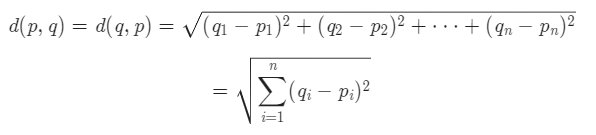

It's a multidimensional extension of a two-dimensional Euclidean distance.

In [16]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 0.8211549091846528
Distance between B and C: 0.34743558135053815


In [17]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=1)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 7.720474720699713
Distance between B and C: 3.1546838842332363


In [18]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

5.0
2.23606797749979


In the previous step, we already have all the face embeddings in the image we have. Now let's implement a function that calculates the distance between two embedding vectors. You can get it easily by using np.linalg.norm as seen above.   
   
The `get_distance()` function below takes two person names in the file name as arguments and **finds the distance (L2 distance) between the face embeddings of two people.**

In [19]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.888511807112004

# Visualization of Face Embedding Space

There are ways to **reduce dimensionality** to **visualize these multidimensional vectors, such as embeddings that change dimensional data to a lower dimension.** Examples include **PCA, T-SNE, etc** So let's see how the embeddings are laid out by visualizing them. TensorFlow's Projector allows you to visually see high-dimensional vectors using dimensionality reduction techniques.

Refer to the [Embedding Projector](https://huyhoang17.github.io/128D-Facenet-LFW-Embedding-Visualisation/)

**PCA** checks the variance, which is the degree of change of values along the axes of all dimensions, and leaves the major axis with the largest change.   
[PCA](https://bcho.tistory.com/1209?category=555440)
   
**T-SNE** is a method of reducing the dimension so that it is placed farther in the high dimension and farther in the low dimension. First, you can understand it as an algorithm that randomly arranges data in a target dimension and then changes the position while comparing each data with the arrangement in a high dimension.
[T-SNE](https://www.youtube.com/watch?v=NEaUSP4YerM)

# Find the most look - alike Face

Above, we defined these four methods:   

-` def get_cropped_face(image_file)` : 이미지 파일에서 얼굴 영역을 가져오는 함수
- `def get_face_embedding(face)` : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
- `def get_face_embedding_dict(dir_path)` : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
-` def get_distance(name1, name2)` : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수

We want to create a function that we can write it like this:    
If **a person's name is given **to the name argument, other images and distance information that most resemble that person should be** sorted and displayed in the order of closest.**

In [20]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('trump')

In [21]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

We already have a dictionary of face embeddings for all image files.   
Now we will sort this dictionary in **ascending order,** but w**e will sort by the embedding vector distance function** from trump. In this case, **the lambda function is used as the sort key.**

In [22]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962465,  0.20268653,  0.03236368,  0.02439236, -0.06226429,
          0.05140708,  0.07351795, -0.16823344,  0.06962213, -0.05557962,
          0.17270115, -0.05094168, -0.35293114, -0.03164374,  0.0379298 ,
          0.17343853, -0.13260117, -0.15357378, -0.23523533, -0.08442686,
         -0.00134148,  0.0321067 , -0.08926149, -0.0267079 , -0.09581175,
         -0.25792351, -0.01057006, -0.11071659,  0.03133575, -0.0744492 ,
          0.05670554, -0.02273792, -0.19461147, -0.04576051,  0.00947583,
          0.01806067, -0.15026242, -0.0778732 ,  0.17577612,  0.01933256,
         -0.19744582, -0.03930522,  0.07374461,  0.20196025,  0.14767551,
         -0.01415388,  0.01724749, -0.11976211,  0.0946297 , -0.24318154,
         -0.0275512 ,  0.12169901,  0.14837697,  0.17079787,  0.06952564,
         -0.15360463,  0.02005425,  0.08199155, -0.19544819,  0.10653647,
          0.11468481, -0.21902826, -0.07677589, -0.06791048,  0.105876  ,
          0.05921572, -0.06

In [23]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [24]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('obama')

순위 1 : 이름(biden), 거리(0.8467205554614515)
순위 2 : 이름(bush), 거리(0.8628474536945554)
순위 3 : 이름(reagan), 거리(0.8692437108490952)
순위 4 : 이름(trump), 거리(0.888511807112004)
순위 5 : 이름(clinton), 거리(0.90009982191251)


# References:
- Google Cloud article / Extracting and serving feature embedding for ML: https://cloud.google.com/architecture/overview-extracting-and-serving-feature-embeddings-for-machine-learning?hl=ko
- dlib Face Recognition repo: https://github.com/ageitgey/face_recognition
- (Florian Schroff) FaceNet: A Unified Embedding for Face Recognition and Clustering: https://arxiv.org/abs/1503.03832